# Node and Graph Embeddings with Color Refinement
 
This is a technique for embedding node attributes and local neighborhoods such that when two nodes have the same color there is an arbitrarily close to 100% chance that they have identical local neighborhoods.
 
Primarily based on this lecture:

Stanford Online, Professor Jure Leskovec
[CS224W: Machine Learning with Graphs | 2021 | Lecture 2.3 - Traditional Feature-based Methods: Graph](https://www.youtube.com/watch?v=buzsHTa4Hgs&t=701s)
   

[Source Code for ColorRefinment](https://github.com/parkerburchett/TDC-DeepLearning/blob/main/utils/ColorRefinement.py) 

In [1]:
import ColorRefinement as cr
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pysmiles import read_smiles

In [75]:
def compute_mol_only_elements(smile):
    mol = read_smiles(smile)
    for n in mol.nodes:
        del mol.nodes[n]['charge']
        del mol.nodes[n]['hcount']
        del mol.nodes[n]['aromatic']
    return mol

def show_mol_only_elements(mol):
    labels = nx.get_node_attributes(mol, 'element')
    plt.figure(figsize=(6,6)) 
    nx.draw_kamada_kawai(mol,labels=labels,node_size=2000, font_size=35)
    plt.show()


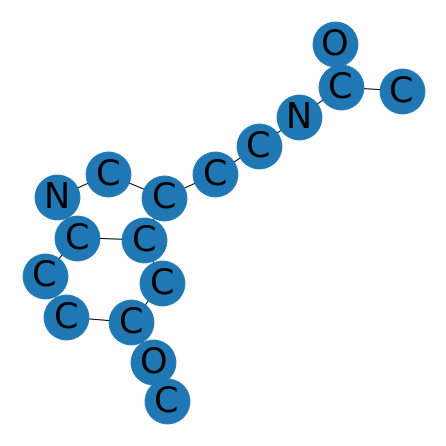

In [76]:
melatonin ='CC(=O)NCCC1=CNc2c1cc(OC)cc2'
mol = compute_mol_only_elements(melatonin)
show_mol_only_elements(mol)

# Color Refinement

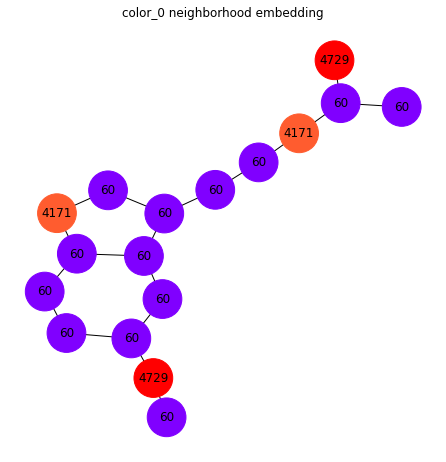

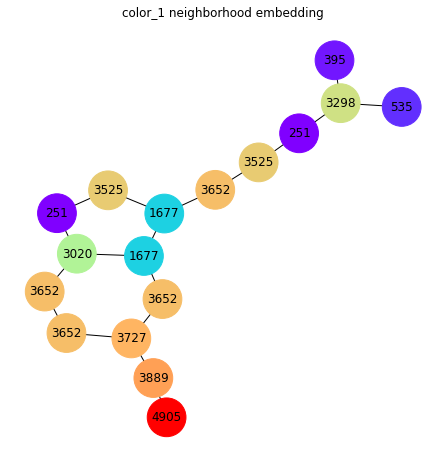

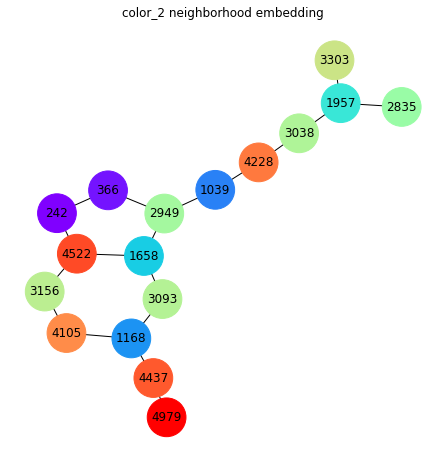

In [89]:
def render_color_graph(color_graph, color_number):
    labels = nx.get_node_attributes(color_graph, color_number)
    color_df = pd.DataFrame.from_dict(labels.items())
    color_df.columns = ['ID', 'COLOR']
    color_df
    plt.figure(figsize=(6,6)) 
    nx.draw_kamada_kawai(color_graph,
                        labels=labels,
                        node_size=1500,node_color=color_df['COLOR'],
                        cmap=plt.cm.rainbow)
    plt.title(f'{color_number} neighborhood embedding')
    plt.show()
color_graph = cr._compute_K_color_refinements(G=mol,K=5, num_buckets=5000)
render_color_graph(color_graph, 'color_0')
render_color_graph(color_graph, 'color_1')
render_color_graph(color_graph, 'color_2')

## Larger and Similar molecules

Atom "[C@@]" contains stereochemical information that will be discarded.


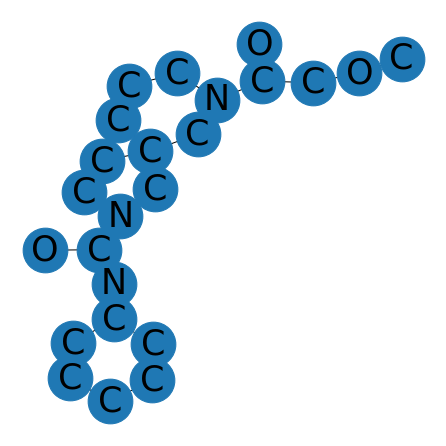

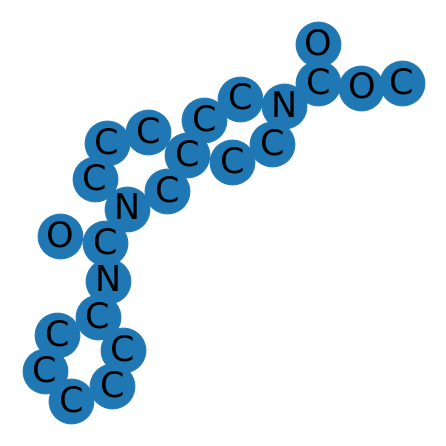

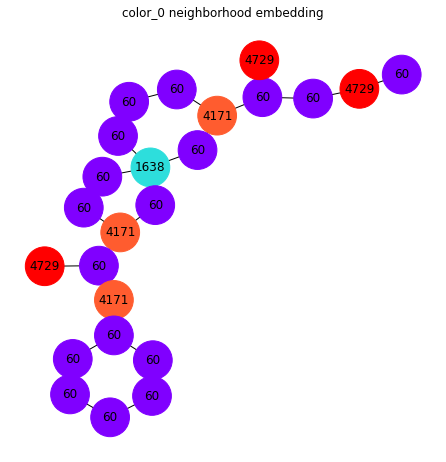

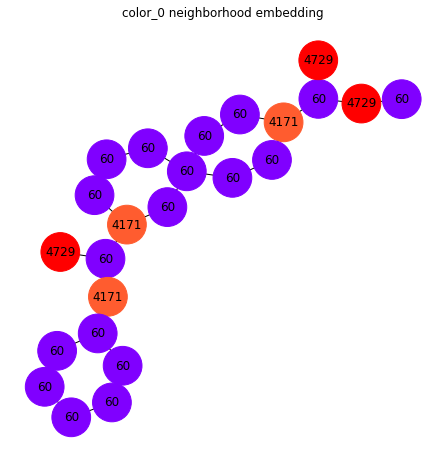

In [100]:
mol_1 = compute_mol_only_elements('COCC(=O)N1CCC[C@@]2(CCN(C(=O)Nc3ccccc3)C2)C1')
mol_2 = compute_mol_only_elements('COC(=O)N1CCC2(CCCN(C(=O)Nc3ccccc3)C2)CC1')
show_mol_only_elements(mol_1)
show_mol_only_elements(mol_2)



mol_1_color_graph = cr._compute_K_color_refinements(mol_1,5, 5000)
mol_2_color_graph = cr._compute_K_color_refinements(mol_2,5, 5000)
render_color_graph(mol_1_color_graph, 'color_0')
render_color_graph(mol_2_color_graph, 'color_0')


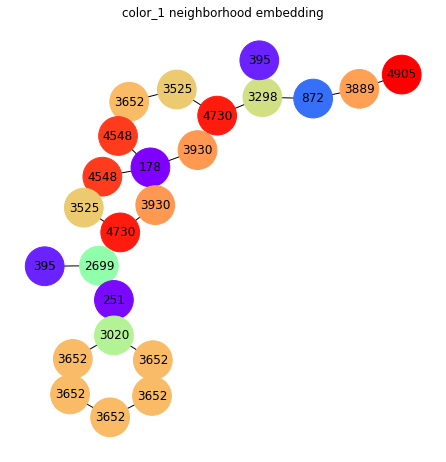

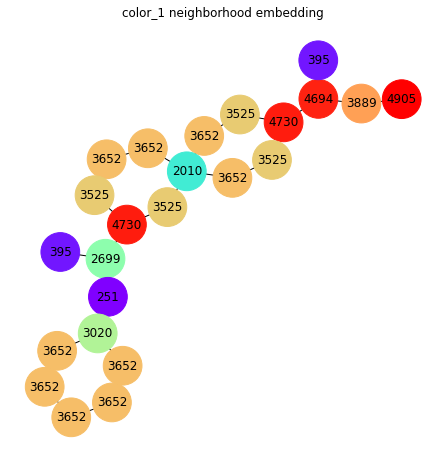

In [98]:
render_color_graph(mol_1_color_graph, 'color_1')
render_color_graph(mol_2_color_graph, 'color_1')

You can still see how similar these molecules are after 1 hop.

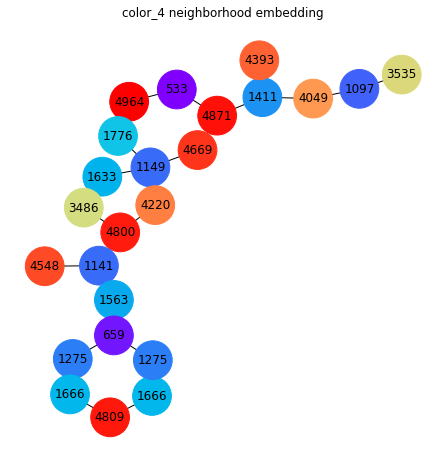

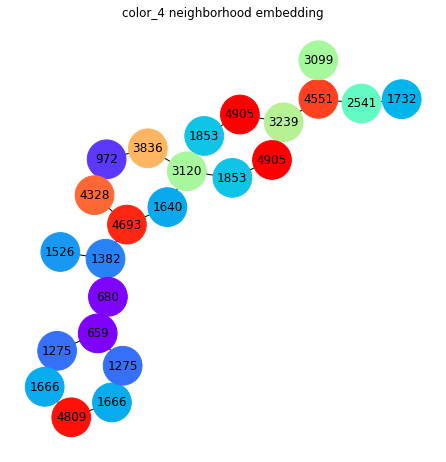

In [99]:
render_color_graph(mol_1_color_graph, 'color_4')
render_color_graph(mol_2_color_graph, 'color_4')

Even at the 4th hop the molecules are still similar, This is because the subgraphs of size 4 starting at the bottom left section are identical. The other subgraphs diverge into different colors 

In [92]:
graph_node_colors = cr._compute_node_colors(mol,3,5000)
print('0 hop')
print(graph_node_colors.iloc[0].value_counts())
# there are no nodes that have the same 2 hop neighborhood
print('1 hop')
print(graph_node_colors.iloc[1].value_counts())
print('2 hop')
print(graph_node_colors.iloc[2].value_counts())


0 hop
60      13
4729     2
4171     2
Name: color_0, dtype: int64
1 hop
3652    4
251     2
3525    2
1677    2
535     1
3298    1
395     1
3020    1
3727    1
3889    1
4905    1
Name: color_1, dtype: int64
2 hop
2835    1
4522    1
4105    1
4979    1
4437    1
1168    1
3093    1
1658    1
242     1
1957    1
366     1
2949    1
1039    1
4228    1
3038    1
3303    1
3156    1
Name: color_2, dtype: int64


# This is what I use externally




In [8]:
df = pd.read_csv('/home/parkerburchett/Documents/GitHub/TDC/TDC-DeepLearning/data/cleaned_raw_data.csv')
sample_smiles = [read_smiles(s) for s in df.loc[:100,'SMILE']]

feature_dfs = cr.create_hop_feature_dfs(sample_smiles, 5,100)


E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded


In [9]:
feature_dfs[0] # the 0 hop embedding

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,7,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,3,0,0,0,0
97,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,0
99,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
